In [ ]:
!pip install geneticalgorithm
!pip install mlxtend --user
!pip install lightgbm --user
!pip install xgboost --user

In [1]:
import pandas as pd
import numpy as np
import sklearn as skt
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import sklearn
import seaborn as sns
import pickle
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
%matplotlib inline
sns.set()
import matplotlib as mpl
mpl.rcParams.update({'figure.max_open_warning': 0})

In [2]:
df = pd.read_csv("/mnt/CO2Pred/data/winter_dataset_filtered_by_outliers.csv").drop(columns = ['Unnamed: 0', 'Field_Name'])

In [3]:
df25 = df[df.loc[:, 'Soil_Organic_Matter']==2.5]

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_N', ylabel='Density'>

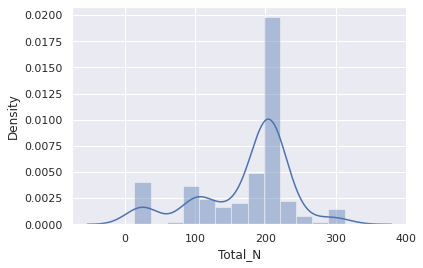

In [5]:
sns.distplot(df25.Total_N)

/opt/conda/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Soil_Organic_Matter', ylabel='Density'>

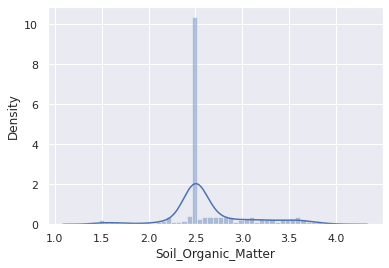

In [6]:
sns.distplot(df.Soil_Organic_Matter)

In [ ]:
dfX.head()

In [ ]:
dfY.head()

In [4]:
loaded_model_co2 = pickle.load(open('/mnt/CO2Pred/Pickle/xgboost_summer_co2', 'rb'))
loaded_standard_scaler_co2 = pickle.load(open('/mnt/CO2Pred/Pickle/standard_scaler_co2', 'rb'))
loaded_power_scaler_co2 = pickle.load(open('/mnt/CO2Pred/Pickle/power_transform_co2', 'rb'))

loaded_model_yield = pickle.load(open('/mnt/CO2Pred/Pickle/xgboost_summer', 'rb'))
loaded_standard_scaler_yield = pickle.load(open('/mnt/CO2Pred/Pickle/standard_scaler', 'rb'))
loaded_power_scaler_yield = pickle.load(open('/mnt/CO2Pred/Pickle/power_transform', 'rb'))

In [23]:
full_features = dfX.iloc[0,:]
a = loaded_model_co2.predict(full_features.to_numpy().reshape(1,-1))
b = loaded_model_co2.predict(full_features.to_numpy().reshape(1,-1))
c = loaded_power_scaler_co2.inverse_transform(b.reshape(-1,1))
# c = loaded_standard_scaler_co2.inverse_transform(loaded_power_scaler_co2.inverse_transform(loaded_model_co2.predict(full_features.to_numpy().reshape(1,-1))))

In [25]:
c

array([[-0.43604112]], dtype=float32)

In [15]:
print(a)
print(b)

[-0.42098746]
[-0.42098746]


In [ ]:
import numpy as np
from functools import partial
from geneticalgorithm import geneticalgorithm as ga

def yield_co2_ratio(context, action):
    """F are uncontrolled features, X are controlled features"""
    full_features = np.hstack([context,action]).reshape([1,-1])
    co2_pred = loaded_standard_scaler_co2.inverse_transform(loaded_power_scaler_co2.inverse_transform(loaded_model_co2.predict(full_features).reshape(-1,1)))
    yield_pred = loaded_standard_scaler_yield.inverse_transform(loaded_power_scaler_yield.inverse_transform(loaded_model_yield.predict(full_features).reshape(-1,1)))
    return yield_pred/co2_pred

varbound=np.array([[0,500]]*7)

In [ ]:
# convergence=model.report
# model.output_dict
algorithm_param = {'max_num_iteration': 500,\
                   'population_size':100,\
                   'mutation_probability':0.1,\
                   'elit_ratio': 0.01,\
                   'crossover_probability': 0.5,\
                   'parents_portion': 0.3,\
                   'crossover_type':'uniform',\
                   'max_iteration_without_improv':None}

In [ ]:
prescription = {i:{"variable":None, "yield_co2_ratio": None, "yield_pred": None, "co2_pred":None} for i in range(dfX.shape[0])}
for index, row in dfX.iterrows():
    context = row.to_numpy()[:2]
    fun_to_optimize = partial(yield_co2_ratio, context)

    model=ga(function=fun_to_optimize,dimension=7,variable_type='real',variable_boundaries=varbound,algorithm_parameters=algorithm_param)
    model.run()
    
    prescription[index]['variable'] = model.output_dict['variable']
    prescription[index]['yield_co2_ratio'] = model.output_dict['function']
    
    full_features = np.hstack([context,model.output_dict['variable']]).reshape([1,-1])
    co2_pred = loaded_standard_scaler_co2.inverse_transform(loaded_power_scaler_co2.inverse_transform(loaded_model_co2.predict(full_features).reshape(-1,1)))
    yield_pred = loaded_standard_scaler_yield.inverse_transform(loaded_power_scaler_yield.inverse_transform(loaded_model_yield.predict(full_features).reshape(-1,1)))
    
    prescription[index]['yield_pred'] = yield_pred
    prescription[index]['co2_pred'] = co2_pred

In [ ]:
prescription

In [ ]:
index

In [ ]:
prescription[100]

In [ ]:
prescription[398]

#### Save the model

In [ ]:
import pickle
pres = prescription
presPickle = open('pres', 'wb')
pickle.dump(pres, presPickle)  

### Load the prescription results and explore

In [ ]:
loaded_pres = pickle.load(open('/mnt/CO2Pred/Pickle/pres', 'rb'))

In [ ]:
2

In [2]:
i = 0
for i in range(0,10000000000000):
    j = i

KeyboardInterrupt: 

In [3]:
i

5646395

In [4]:
j

5646395